In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
digits=pd.read_csv('mnist_data.csv')
digits.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x=digits.loc[:,digits.columns!='6']
y=digits['6']

In [5]:
x

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y

0        5
1        7
2        9
3        5
4        2
        ..
19994    0
19995    1
19996    2
19997    9
19998    5
Name: 6, Length: 19999, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
x_train.shape

(15999, 784)

In [9]:
x_train_flattened=x_train.to_numpy()
x_train_flattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
x_train_flattened.shape

(15999, 784)

In [11]:
x_train_flattened[0].shape

(784,)

In [12]:
x_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   3, 179, 196, 184,  91,  27,  10,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   2, 157, 201, 201, 224, 254, 220,  73,   8,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  6

In [13]:
x_test_flattened=x_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [14]:
y_train

array([2, 6, 1, ..., 9, 9, 7], dtype=int64)

In [15]:
x_test_flattened.shape

(4000, 784)

In [16]:
y_test.shape

(4000,)

In [17]:
#MODEL WITH NO HIDDEN LAYER

model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened,y_train,epochs=10)

Epoch 1/10
500/500 [==============================] - 2s 2ms/step - loss: 16.5338 - accuracy: 0.7700
Epoch 2/10
500/500 [==============================] - 1s 2ms/step - loss: 6.9813 - accuracy: 0.8669
Epoch 3/10
500/500 [==============================] - 1s 2ms/step - loss: 6.0046 - accuracy: 0.8776
Epoch 4/10
500/500 [==============================] - 1s 2ms/step - loss: 5.4489 - accuracy: 0.8822
Epoch 5/10
500/500 [==============================] - 1s 2ms/step - loss: 5.0087 - accuracy: 0.8924
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 4.7146 - accuracy: 0.8918
Epoch 7/10
500/500 [==============================] - 1s 2ms/step - loss: 4.6489 - accuracy: 0.8950
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 4.2522 - accuracy: 0.9031
Epoch 9/10
500/500 [==============================] - 1s 2ms/step - loss: 4.4723 - accuracy: 0.8977
Epoch 10/10
500/500 [==============================] - 1s 2ms/step - loss: 4.3208 - accuracy: 0.906

In [18]:
model.evaluate(x_test_flattened,y_test)

125/125 [==============================] - 0s 1ms/step - loss: 8.0833 - accuracy: 0.8652


[8.083263397216797, 0.8652499914169312]

In [19]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

125/125 [==============================] - 0s 1ms/step


array([1.9402526e-09, 8.0747508e-05, 1.7695929e-07, 1.0000000e+00,
       7.9366553e-36, 9.9999887e-01, 7.3553802e-11, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

In [20]:
np.argmax(y_predicted[0])

3

In [21]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[3, 7, 0, 3, 4, 4, 4, 0, 4, 1]

In [22]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=int64)

In [23]:
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[372,   2,   1,   2,   0,   0,   0,   0,   0,   0],
       [  0, 436,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 77, 107, 199,   1,   3,   0,   0,   2,   1,   0],
       [ 75,  91, 125, 114,   1,   0,   0,   0,   0,   0],
       [ 18,  24,  35,  86, 237,   0,   0,   0,   0,   1],
       [117,  21,  33, 132,  13,  24,   0,   0,   1,   0],
       [ 83,  62, 202,  34,  12,   9,  10,   0,   0,   0],
       [ 58,  24,  57, 187,  25,  11,   0,  76,   0,   0],
       [ 74, 115,  83,  87,   5,  11,   4,   2,   3,   0],
       [ 18,  30,  19, 225, 104,   2,   1,  12,   2,   2]])>

Text(69.0, 0.5, 'Truth')

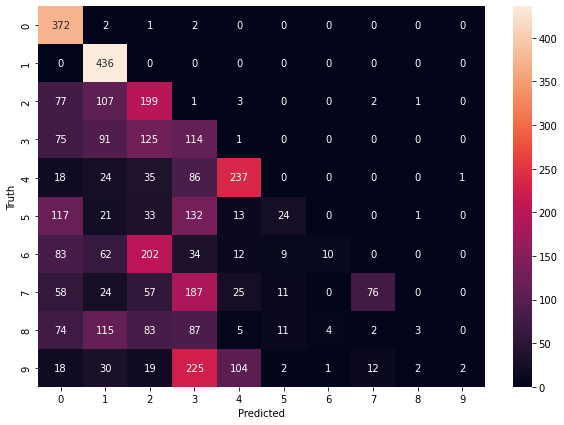

In [24]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
#SCALING THE VALUES IN ORDER TO GET MORE ACCURACY

x_train_flattened=x_train_flattened/255
x_test_flattened=x_test_flattened/255

In [26]:
#MODEL WITH TWO HIDDEN LAYERS

model=keras.Sequential([
    keras.layers.Dense(150,input_shape=(784,),activation='relu'),
    keras.layers.Dense(50,activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flattened,y_train,epochs=10)

Epoch 1/10
500/500 [==============================] - 2s 3ms/step - loss: 0.6587 - accuracy: 0.8488
Epoch 2/10
500/500 [==============================] - 1s 3ms/step - loss: 0.2380 - accuracy: 0.9372
Epoch 3/10
500/500 [==============================] - 1s 3ms/step - loss: 0.1656 - accuracy: 0.9540
Epoch 4/10
500/500 [==============================] - 1s 3ms/step - loss: 0.1215 - accuracy: 0.9667
Epoch 5/10
500/500 [==============================] - 1s 3ms/step - loss: 0.0905 - accuracy: 0.9748
Epoch 6/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0697 - accuracy: 0.9817
Epoch 7/10
500/500 [==============================] - 1s 3ms/step - loss: 0.0526 - accuracy: 0.9872
Epoch 8/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0395 - accuracy: 0.9909
Epoch 9/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0297 - accuracy: 0.9936
Epoch 10/10
500/500 [==============================] - 1s 2ms/step - loss: 0.0218 - accuracy: 0.9952

In [27]:
model.evaluate(x_test_flattened,y_test)

125/125 [==============================] - 0s 2ms/step - loss: 0.1187 - accuracy: 0.9645


[0.1186697855591774, 0.9645000100135803]

In [28]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

125/125 [==============================] - 0s 1ms/step


array([0.10918231, 0.6448083 , 0.30330008, 0.54924387, 0.04964417,
       0.00459933, 0.01567814, 0.9975867 , 0.02492889, 0.24760053],
      dtype=float32)

In [29]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 7, 0, 9, 4, 5, 4, 6, 9, 2]

In [30]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=int64)

In [31]:
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[366,   0,   6,   0,   1,   1,   0,   1,   1,   1],
       [  0, 429,   3,   0,   0,   2,   0,   1,   1,   0],
       [  2,   0, 381,   0,   2,   0,   0,   4,   0,   1],
       [  0,   0,   8, 391,   0,   0,   0,   2,   4,   1],
       [  0,   1,   4,   0, 386,   0,   3,   1,   0,   6],
       [  2,   0,   1,   3,   0, 326,   4,   0,   3,   2],
       [  1,   0,   1,   0,   3,   2, 405,   0,   0,   0],
       [  1,   2,   7,   3,   2,   0,   0, 422,   1,   0],
       [  2,   2,   4,   3,   0,   3,   1,   0, 369,   0],
       [  0,   1,   0,   4,  12,   1,   0,   8,   6, 383]])>

Text(69.0, 0.5, 'Truth')

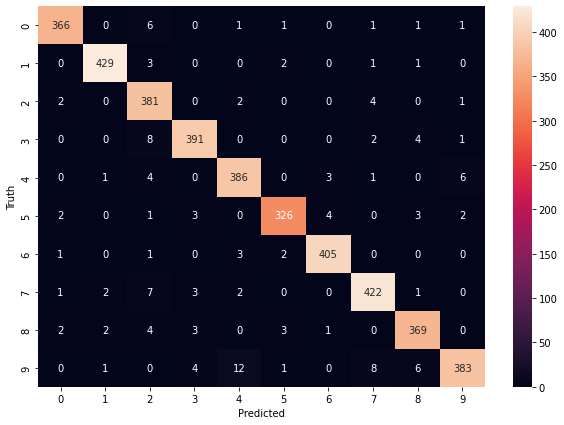

In [32]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(confusion_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')